In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import tqdm

learning_rate = 1e-3
learning_rate = 0.002
mnist_data = datasets.MNIST('data/minst', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:4096]
device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
batch_size = 64


other_data = datasets.Flowers102('data/flowers102', split="train", download=True,
                               transform=transforms.Compose([
                               transforms.Resize(128),
                               transforms.CenterCrop(128),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               transforms.Grayscale(num_output_channels=1),
                           ]))
other_data = list(other_data)[:4096]

train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True, pin_memory=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 7988721.49it/s] 


Extracting data/minst/MNIST/raw/train-images-idx3-ubyte.gz to data/minst/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 15676937.21it/s]

Extracting data/minst/MNIST/raw/train-labels-idx1-ubyte.gz to data/minst/MNIST/raw



100%|██████████| 1648877/1648877 [00:03<00:00, 547743.79it/s]


Extracting data/minst/MNIST/raw/t10k-images-idx3-ubyte.gz to data/minst/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4696875.93it/s]

Extracting data/minst/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/minst/MNIST/raw



100%|██████████| 344862509/344862509 [01:28<00:00, 3880875.32it/s]


Extracting data/flowers102/flowers-102/102flowers.tgz to data/flowers102/flowers-102


100%|██████████| 502/502 [00:00<00:00, 214348.02it/s]


100%|██████████| 14989/14989 [00:00<00:00, 4459702.25it/s]


In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
def train(model, num_epochs=5, learning_rate=learning_rate):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    outputs = []
    for epoch in range(num_epochs):
        for data in tqdm(train_loader):
            img, label = data
            img = img.to(device)

            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs


model = Autoencoder().to(device)
max_epochs = 50
outputs = train(model, num_epochs=max_epochs)

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:01<00:00, 63.77it/s]


Epoch:1, Loss:0.0679


100%|██████████| 64/64 [00:00<00:00, 94.85it/s]


Epoch:2, Loss:0.0597


100%|██████████| 64/64 [00:00<00:00, 98.15it/s]


Epoch:3, Loss:0.0384


100%|██████████| 64/64 [00:00<00:00, 99.45it/s] 


Epoch:4, Loss:0.0256


100%|██████████| 64/64 [00:00<00:00, 98.64it/s] 


Epoch:5, Loss:0.0184


100%|██████████| 64/64 [00:00<00:00, 101.28it/s]


Epoch:6, Loss:0.0148


100%|██████████| 64/64 [00:00<00:00, 101.11it/s]


Epoch:7, Loss:0.0115


100%|██████████| 64/64 [00:00<00:00, 92.82it/s] 


Epoch:8, Loss:0.0119


100%|██████████| 64/64 [00:00<00:00, 92.11it/s]


Epoch:9, Loss:0.0088


100%|██████████| 64/64 [00:00<00:00, 97.98it/s]


Epoch:10, Loss:0.0093


100%|██████████| 64/64 [00:00<00:00, 96.92it/s]


Epoch:11, Loss:0.0084


100%|██████████| 64/64 [00:00<00:00, 95.58it/s]


Epoch:12, Loss:0.0079


100%|██████████| 64/64 [00:00<00:00, 98.80it/s]


Epoch:13, Loss:0.0065


100%|██████████| 64/64 [00:00<00:00, 98.65it/s] 


Epoch:14, Loss:0.0067


100%|██████████| 64/64 [00:00<00:00, 92.17it/s]


Epoch:15, Loss:0.0075


100%|██████████| 64/64 [00:00<00:00, 89.32it/s]


Epoch:16, Loss:0.0057


100%|██████████| 64/64 [00:00<00:00, 97.76it/s]


Epoch:17, Loss:0.0057


100%|██████████| 64/64 [00:00<00:00, 98.60it/s]


Epoch:18, Loss:0.0056


100%|██████████| 64/64 [00:00<00:00, 98.07it/s]


Epoch:19, Loss:0.0050


100%|██████████| 64/64 [00:00<00:00, 98.16it/s] 


Epoch:20, Loss:0.0049


100%|██████████| 64/64 [00:00<00:00, 89.40it/s]


Epoch:21, Loss:0.0052


100%|██████████| 64/64 [00:00<00:00, 87.83it/s]


Epoch:22, Loss:0.0051


100%|██████████| 64/64 [00:00<00:00, 96.92it/s]


Epoch:23, Loss:0.0051


100%|██████████| 64/64 [00:00<00:00, 93.99it/s] 


Epoch:24, Loss:0.0048


100%|██████████| 64/64 [00:00<00:00, 89.36it/s]


Epoch:25, Loss:0.0048


100%|██████████| 64/64 [00:00<00:00, 93.09it/s]


Epoch:26, Loss:0.0046


100%|██████████| 64/64 [00:00<00:00, 91.88it/s]


Epoch:27, Loss:0.0041


100%|██████████| 64/64 [00:00<00:00, 94.76it/s]


Epoch:28, Loss:0.0045


100%|██████████| 64/64 [00:00<00:00, 93.50it/s]


Epoch:29, Loss:0.0043


100%|██████████| 64/64 [00:00<00:00, 97.10it/s]


Epoch:30, Loss:0.0039


100%|██████████| 64/64 [00:00<00:00, 102.26it/s]


Epoch:31, Loss:0.0039


100%|██████████| 64/64 [00:00<00:00, 99.95it/s] 


Epoch:32, Loss:0.0037


100%|██████████| 64/64 [00:00<00:00, 98.25it/s]


Epoch:33, Loss:0.0040


100%|██████████| 64/64 [00:00<00:00, 98.67it/s]


Epoch:34, Loss:0.0039


100%|██████████| 64/64 [00:00<00:00, 97.62it/s]


Epoch:35, Loss:0.0036


100%|██████████| 64/64 [00:00<00:00, 95.50it/s] 


Epoch:36, Loss:0.0035


100%|██████████| 64/64 [00:00<00:00, 97.25it/s]


Epoch:37, Loss:0.0033


100%|██████████| 64/64 [00:00<00:00, 98.81it/s] 


Epoch:38, Loss:0.0037


100%|██████████| 64/64 [00:00<00:00, 100.71it/s]


Epoch:39, Loss:0.0033


100%|██████████| 64/64 [00:00<00:00, 99.99it/s] 


Epoch:40, Loss:0.0031


100%|██████████| 64/64 [00:00<00:00, 99.39it/s] 


Epoch:41, Loss:0.0033


100%|██████████| 64/64 [00:00<00:00, 100.37it/s]


Epoch:42, Loss:0.0037


100%|██████████| 64/64 [00:00<00:00, 99.04it/s] 


Epoch:43, Loss:0.0035


100%|██████████| 64/64 [00:00<00:00, 94.69it/s]


Epoch:44, Loss:0.0036


100%|██████████| 64/64 [00:00<00:00, 101.50it/s]


Epoch:45, Loss:0.0032


100%|██████████| 64/64 [00:00<00:00, 101.30it/s]


Epoch:46, Loss:0.0036


100%|██████████| 64/64 [00:00<00:00, 101.59it/s]


Epoch:47, Loss:0.0031


100%|██████████| 64/64 [00:00<00:00, 97.16it/s]


Epoch:48, Loss:0.0034


100%|██████████| 64/64 [00:00<00:00, 100.43it/s]


Epoch:49, Loss:0.0035


100%|██████████| 64/64 [00:00<00:00, 100.70it/s]

Epoch:50, Loss:0.0030


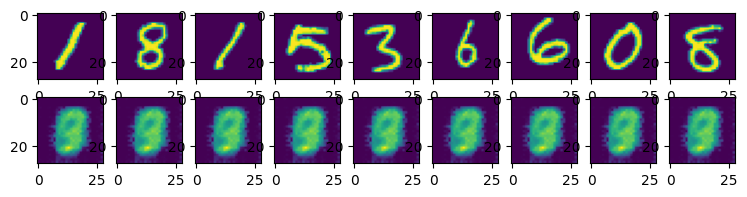

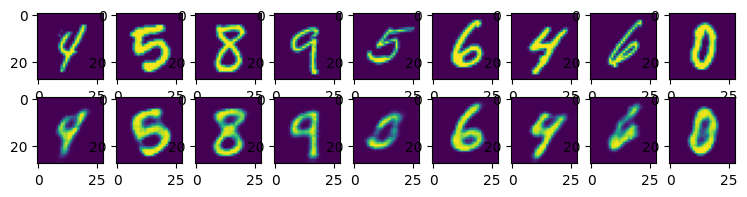

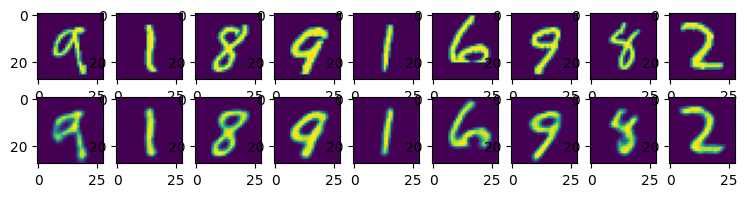

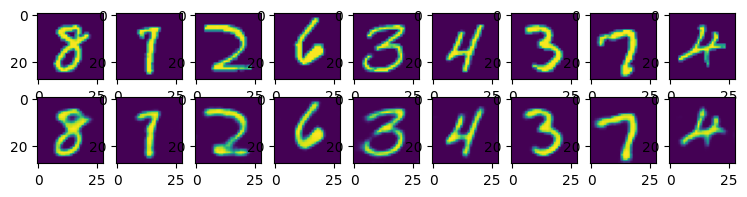

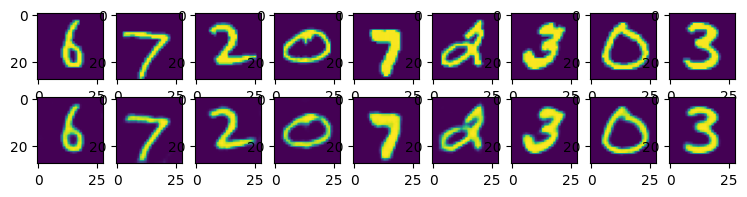

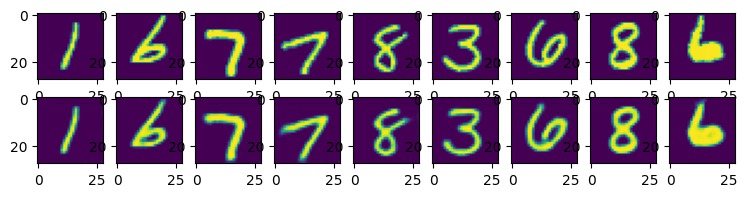

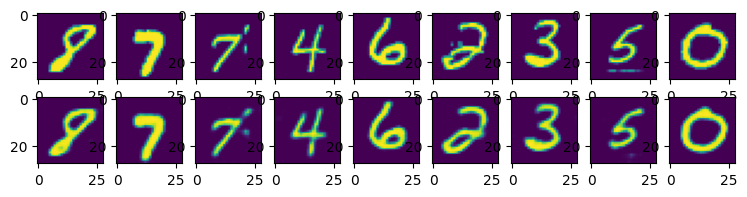

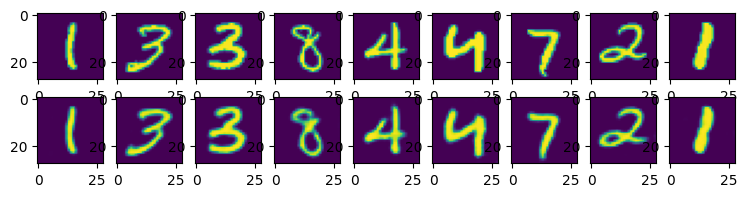

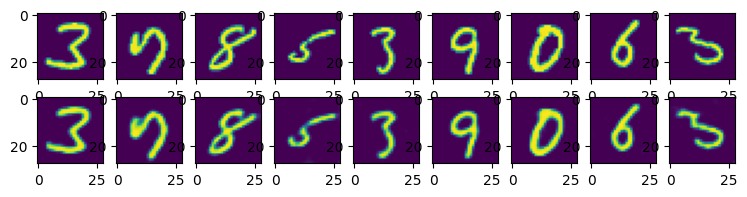

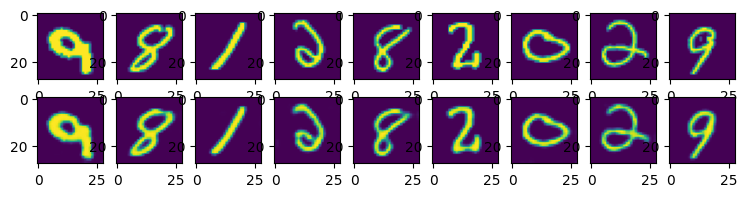

In [4]:
for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().to("cpu").numpy()
    recon = outputs[k][2].detach().to("cpu").numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])